Name Asmat Mehmood

Develop a Convolutional Neural Network From Scratch for  MNIST Handwritten Digit Classification.

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch. This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

In [50]:
import numpy as np
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib as plt
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
import pydot
import graphviz

In [76]:
# Load data & spilt into test & train
(x_train, y_train),(x_test,y_test) = load_data()
(x_train, y_train),(x_test,y_test)

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [20]:

x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[1],1))

x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[1],1))

In [21]:
x_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [22]:
# Normalize the values of pixel images (0 to 1) that improves pperformabce
x_train =x_train.astype('float32')/ 255.0
x_test =x_test.astype('float32')/ 255.0

In [23]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

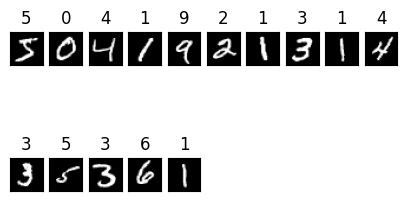

In [29]:
fig = plt.figure(figsize = (5,3))
for i in range(15):
    ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap ='grey')
    ax.set_title(y_train[i])
plt.show()

In [30]:
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [39]:
# Define Model
model = Sequential() # # Define the model

model.add(Conv2D(32,(3,3),activation= 'relu',input_shape = img_shape))  # # First Convolutional Layer
model.add(MaxPool2D(2,2))
# Second Convolutional Layer
model.add(Conv2D(48,(3,3),activation= 'relu'))
model.add(MaxPool2D(2,2))
# Dropout Layer to prevent overfitting

model.add(Dropout(0.5))
# Flatten the output to feed into the fully connected layer

model.add(Flatten())
# Fully Connected Layer
model.add(Dense(500,activation ='relu'))
# Output Layer with softmax activation for multi-class classification
model.add(Dense(10,activation ='softmax'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [52]:
plot_model(model,'model.jpg',show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [53]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [58]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
X =model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 25s - loss: 0.2484 - accuracy: 0.9232 - val_loss: 0.0578 - val_accuracy: 0.9833 - 25s/epoch - 60ms/step
Epoch 2/10
422/422 - 23s - loss: 0.0847 - accuracy: 0.9724 - val_loss: 0.0408 - val_accuracy: 0.9892 - 23s/epoch - 54ms/step
Epoch 3/10
422/422 - 23s - loss: 0.0610 - accuracy: 0.9810 - val_loss: 0.0333 - val_accuracy: 0.9905 - 23s/epoch - 55ms/step
Epoch 4/10
422/422 - 23s - loss: 0.0509 - accuracy: 0.9843 - val_loss: 0.0320 - val_accuracy: 0.9900 - 23s/epoch - 54ms/step
Epoch 5/10
422/422 - 25s - loss: 0.0423 - accuracy: 0.9867 - val_loss: 0.0301 - val_accuracy: 0.9923 - 25s/epoch - 59ms/step
Epoch 6/10
422/422 - 25s - loss: 0.0371 - accuracy: 0.9878 - val_loss: 0.0277 - val_accuracy: 0.9915 - 25s/epoch - 58ms/step
Epoch 7/10
422/422 - 24s - loss: 0.0339 - accuracy: 0.9887 - val_loss: 0.0287 - val_accuracy: 0.9917 - 24s/epoch - 58ms/step
Epoch 8/10
422/422 - 25s - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.0267 - val_accuracy: 0.9922 - 25s/epoch - 59ms/step


In [62]:
loss,accuracy = model.evaluate(x_test,y_test,verbose=0)
print(f'accuracy:{accuracy*100}')

accuracy:99.39000010490417


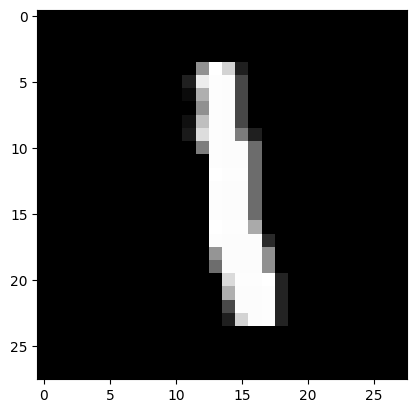

In [74]:
image = x_train[6]
plt.imshow(np.squeeze(image),cmap='grey')
plt.show()

In [75]:
# Reshape the image to the correct shape for the model
image = image.reshape(1, 28, 28, 1)

# Predict the class of the image
p = model.predict(image)

# Print the predicted class
print('Predicted: {}'.format(np.argmax(p)))

1/1 [==============================] - 0s 5ms/step
Predicted: 1


In [77]:
# Save the model
model.save('mnist_cnn_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('mnist_cnn_model.h5')

# Verify the loaded model's performance
loaded_model.evaluate(x_test, y_test)


c:\Users\Asmat Mehmood\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 2s 5ms/step - loss: 9.3190 - accuracy: 0.9826


[9.318979263305664, 0.9825999736785889]

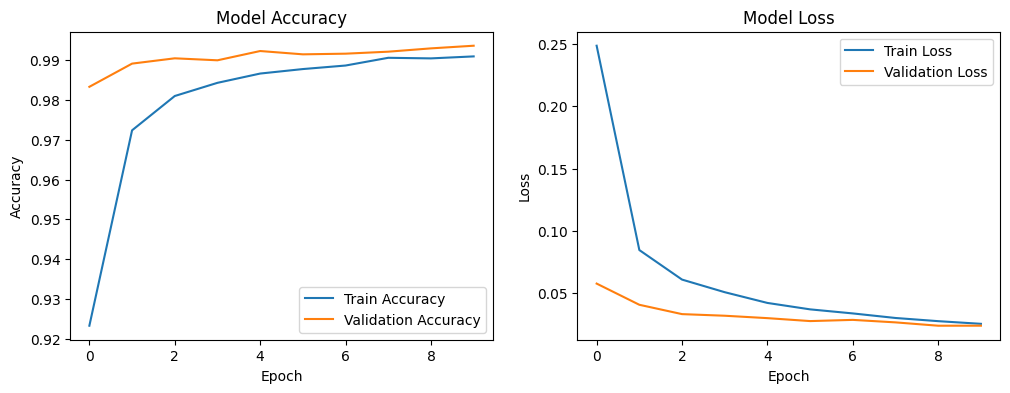

In [81]:

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(X.history['accuracy'], label='Train Accuracy')
plt.plot(X.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='best')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(X.history['loss'], label='Train Loss')
plt.plot(X.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

# Show the plots
plt.show()
